<a href="https://colab.research.google.com/github/anjalinagel12/Google-colab-notebook/blob/master/akaike_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np                          
import pandas as pd                           
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import names  
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [25]:
train_data=pd.read_csv('train_data.csv')
train_label=pd.read_csv('train_label.csv')
display(train_data.head(),train_label.head())

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565


,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified


In [26]:
train_data.shape

(41569, 2)

In [27]:
train_label.shape

(75170, 2)

In [28]:
data_merge=pd.merge(train_data,train_label,on='id')
data_merge.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
1,"Keep your gloves, hats, coats and jackets toge...",122885,Finish
2,"Keep your gloves, hats, coats and jackets toge...",122885,Hardware Included
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
4,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Features


In [29]:
data_merge.shape


(75170, 3)

In [30]:
train_data['text'].value_counts()


The 868P34WHX Horizon 16 in. W Recessed Medicine Cabinet features a frameless 1/2 in. bevel edged glass mirror for a classic good that blends effortlessly into any decor. The steel body will give many years of sturdy service and has a painted white interior for a fresh presentation. 2 adjustable steel shelves allow you to fit a variety of container heights and the full length continuous Piano Hinge allows ready access, keeping toiletries within easy reach.16 in. W x 36 in. H x 4-1/2 in. D cabinet allows for ample storageFrameless, 1/2 in. beveled float glass mirror ensures a deep, distortion-free, rich reflectionBasic white steel cabinet sports clean, crisp cornersMounting hardware included for your convenience allow for quick and convenient installationPre-drilled mounting holes allow for quick and convenient installation2 adjustable steel shelves provide convenient storageFull length, continuous piano hinge allows for easy access to your items                                         

In [31]:
data=data_merge.drop_duplicates(subset='text')
data.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
7,The Bosch 18-Volt lithium-ion line of Cordless...,146065,Tools Product Type
9,Restore your Porter-Cable sander or polisher t...,165138,Tools Product Type
10,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,Commercial / Residential


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41569 entries, 0 to 75169
Data columns (total 3 columns):
text     41569 non-null object
id       41569 non-null int64
label    41569 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [33]:
data['label'].value_counts()

Commercial / Residential    5769
ENERGY STAR Certified       5727
Assembly Required           4266
Tools Product Type          4090
Color                       4019
Indoor/Outdoor              2990
Finish                      2980
Package Quantity            2497
Hardware Included           2440
Features                    2238
Voltage (volts)             1514
Included                    1468
Shape                       1059
Flooring Product Type        328
Wattage (watts)              184
Name: label, dtype: int64

In [0]:
com_res=data[data['label']=='Commercial / Residential']
energy_cer=data[data['label']=='ENERGY STAR Certified']
assem_req=data[data['label']=='Assembly Required']
tool_type=data[data['label']=='Tools Product Type']
colour=data[data['label']=='Color']
in_out=data[data['label']=='Indoor/Outdoor']
finish=data[data['label']=='Finish']
pack_qua=data[data['label']=='Package Quantity']
hardware=data[data['label']=='Hardware Included']
features=data[data['label']=='Features']
volt=data[data['label']=='Voltage (volts)']
include=data[data['label']=='Included']
shape=data[data['label']=='Shape']
floor_type=data[data['label']=='Flooring Product Type']
watt=data[data['label']=='Wattage (watts)']
from nltk.corpus import stopwords

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
com_res_words=' '
for val in com_res['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        com_res_words=com_res_words + words + ' '


**Visualization**

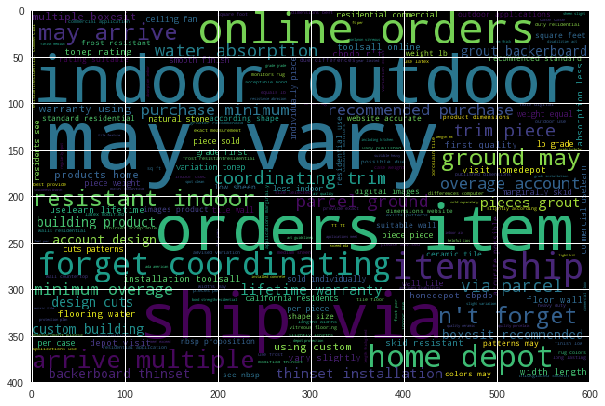

In [38]:
cos_res_wordcloud = WordCloud(width=600, height=400).generate(com_res_words)
plt.figure(figsize=(10,10))
plt.imshow(cos_res_wordcloud)

In [0]:
energy_cer_words=' '
for val in energy_cer['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        energy_cer_words=energy_cer_words + words + ' '


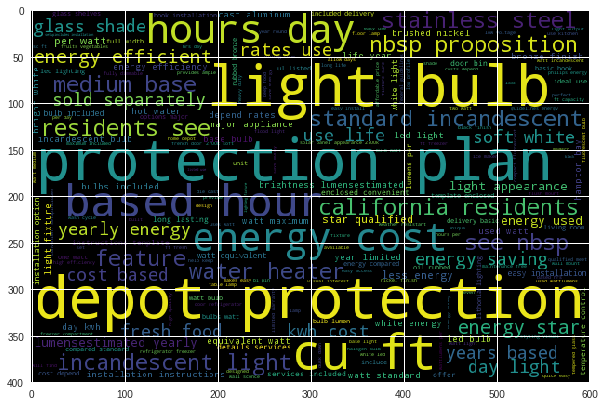

In [40]:
energy_cer_wordcloud = WordCloud(width=600, height=400).generate(energy_cer_words)
plt.figure(figsize=(10,10))
plt.imshow(energy_cer_wordcloud)


In [0]:
floor_type_words=' '
for val in floor_type['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        floor_type_words=floor_type_words + words + ' '


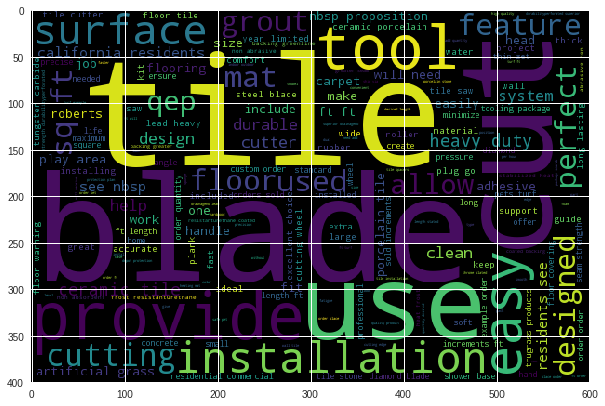

In [42]:
floor_type_wordcloud = WordCloud(width=600, height=400).generate(floor_type_words)
plt.figure(figsize=(10,10))
plt.imshow(floor_type_wordcloud)


In [0]:
watt_words=' '
for val in watt['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        watt_words=watt_words + words + ' '

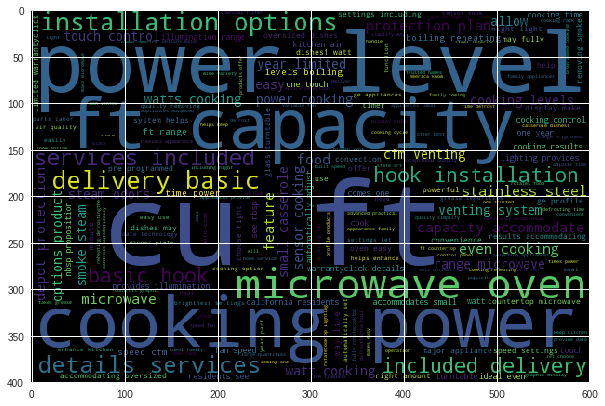

In [44]:
watt_wordcloud = WordCloud(width=600, height=400).generate(watt_words)
plt.figure(figsize=(10,10))
plt.imshow(watt_wordcloud)

In [45]:
data['label']=pd.factorize(data['label'])[0]
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,0
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,1
7,The Bosch 18-Volt lithium-ion line of Cordless...,146065,2
9,Restore your Porter-Cable sander or polisher t...,165138,2
10,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,1


In [0]:
x=data['text']
y=data['label']


**Now we'll clean the data using nltk packages and we'll append it to cleaned.**

In [49]:
import nltk
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

In [0]:
all_names=set(names.words())
lemmatizer=WordNetLemmatizer()
def letters_only(astr):                   #it will remove all the numbers and return only words 
    return astr.isalpha()

In [52]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
cleaned=[]
for post in data['text']:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
                                                for word in post.split()
                                                if letters_only(word) and word not in all_names]))


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',max_features=2000)
x2=cv.fit_transform(cleaned)
x2


<41569x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 1638404 stored elements in Compressed Sparse Row format>

**now we'll train the model**

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.30,random_state=0)

In [0]:
def classifier(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    return accuracy

In [57]:
classifier(LogisticRegression()),classifier(SVC()),classifier(MultinomialNB(alpha=1))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.8545425386897603, 0.7331408868575094, 0.7424424665223318)

In [58]:
#we'll take the test data
y_sample=pd.read_csv('test_data.csv')
y_sample.head()

,text,id
0,These machine screw nuts are designed to be us...,114689
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304
3,Native Collection Plus has Shaw's SilentStep P...,184115
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786


In [0]:
x_train=data['text']
y_train=data['label']
x_test=y_sample['text']

**we'll make a pipeline for getting more accurate results for new values.**


In [0]:
pipe_lr=make_pipeline(CountVectorizer(stop_words='english',max_features=2000),
                     LogisticRegression(penalty='l2',C=1))


In [61]:
pipe_lr.fit(x_train,y_train)
y_pred=pipe_lr.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [62]:
y_pred

array([3, 2, 3, ..., 3, 6, 1])

In [0]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')
